In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [2]:
TitanicSurvivalDataNumeric.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [3]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [5]:
# Standardized predictors
X[0:3]

array([[ 0.82737724,  0.73769513, -0.55604973,  0.43279337, -0.47367361,
        -0.50244517, -0.4838099 , -0.30974338,  0.61930636],
       [-1.56610693, -1.35557354,  0.59548094,  0.43279337, -0.47367361,
         0.78684529,  2.06692751, -0.30974338, -1.61470971],
       [ 0.82737724, -1.35557354, -0.26816707, -0.4745452 , -0.47367361,
        -0.48885426, -0.4838099 , -0.30974338,  0.61930636]])

In [6]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         0.    ,  0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         0.    ,  1.    ]])

In [7]:
y[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

# Classification using Deep Learning- Artificial Neural Networks(ANN)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\SAYAN\anaconda0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SAYAN\anaconda0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SAYAN\anaconda0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SAYAN\anaconda0\lib\site-packages\tensorflow\python\framework\dtypes.py

In [9]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)


Epoch 1/10
623/623 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.6260
Epoch 2/10
623/623 [==============================] - 0s 193us/step - loss: 0.6756 - accuracy: 0.6292
Epoch 3/10
623/623 [==============================] - 0s 217us/step - loss: 0.6263 - accuracy: 0.6709
Epoch 4/10
623/623 [==============================] - 0s 191us/step - loss: 0.5523 - accuracy: 0.7833
Epoch 5/10
623/623 [==============================] - 0s 233us/step - loss: 0.5050 - accuracy: 0.8154
Epoch 6/10
623/623 [==============================] - 0s 193us/step - loss: 0.4812 - accuracy: 0.8138
Epoch 7/10
623/623 [==============================] - 0s 207us/step - loss: 0.4672 - accuracy: 0.8026
Epoch 8/10
623/623 [==============================] - 0s 201us/step - loss: 0.4577 - accuracy: 0.8042
Epoch 9/10
623/623 [==============================] - 0s 204us/step - loss: 0.4522 - accuracy: 0.8058
Epoch 10/10
623/623 [==============================] - 0s 230us/step - loss: 0.4488

In [13]:
# Training data Accuracy of the model is the the accuracy achieved in the last epoch
survivalANN_Model.history['accuracy'][-1]

0.80417335

# Finding best set of parameters using grid search

In [16]:
def FunctionFindBestParams(X_train, y_train):
    
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [17]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8025682
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.80738366
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.84751207
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8555377
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.81380415
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.81219906
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.81701446
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.85393256
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.8154093
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.80417335
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.83146065
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8507223
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.66452646
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.81219906
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.8250401
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.841

C:\Users\SAYAN\anaconda0\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Parameters'>

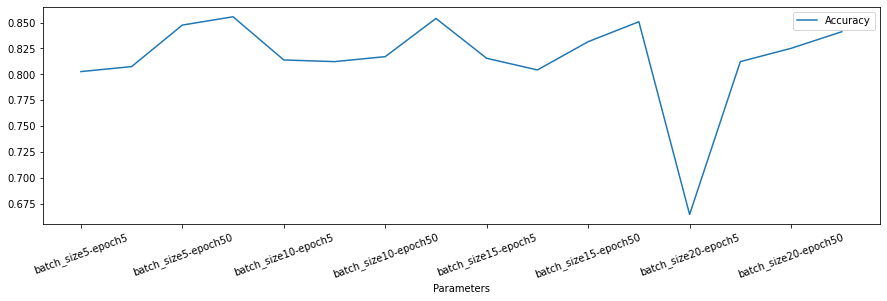

In [18]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [19]:
# Printing the best parameter
ResultsData.sort_values(by='Accuracy', ascending=False).head(1)

,TrialNumber,Parameters,Accuracy
0,4,batch_size5-epoch100,0.855538


# Training the model using best parameters

In [20]:
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
623/623 [==============================] - 0s 472us/step - loss: 0.4474 - accuracy: 0.8074
Epoch 2/100
623/623 [==============================] - 0s 458us/step - loss: 0.4427 - accuracy: 0.8090
Epoch 3/100
623/623 [==============================] - 0s 466us/step - loss: 0.4394 - accuracy: 0.8138
Epoch 4/100
623/623 [==============================] - 0s 479us/step - loss: 0.4365 - accuracy: 0.8138
Epoch 5/100
623/623 [==============================] - 0s 514us/step - loss: 0.4344 - accuracy: 0.8138
Epoch 6/100
623/623 [==============================] - 0s 475us/step - loss: 0.4327 - accuracy: 0.8122
Epoch 7/100
623/623 [==============================] - 0s 501us/step - loss: 0.4292 - accuracy: 0.8138
Epoch 8/100
623/623 [==============================] - 0s 483us/step - loss: 0.4268 - accuracy: 0.8122
Epoch 9/100
623/623 [==============================] - 0s 610us/step - loss: 0.4261 - accuracy: 0.8154
Epoch 10/100
623/623 [==============================] - 0s 715us/step - l

In [21]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.3:
        return(1)
    else:
        return(0)

TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
TestingData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survival,PredictedSurvivalProb,PredictedSurvival
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0.239306,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0.088415,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0.147134,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,0.954674,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,0.582531,1


In [22]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
TitanicSurvivalDataNumeric[(TitanicSurvivalDataNumeric['Fare']==11.2417) & (TitanicSurvivalDataNumeric['Age']==14)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
39,1,3,0,14.0,1,0,11.2417,1,0,0


In [23]:
from sklearn import metrics
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

[[132  25]
 [ 28  83]]


# Sklearn GridSearchCV

In [24]:
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=9, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }


classifierModel=KerasClassifier(make_classification_ann, verbose=0)

In [26]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

In [ ]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
498/498 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.6225
Epoch 2/10
498/498 [==============================] - 0s 243us/step - loss: 0.6862 - accuracy: 0.6285
Epoch 3/10
498/498 [==============================] - 0s 231us/step - loss: 0.6750 - accuracy: 0.7149
Epoch 4/10
498/498 [==============================] - 0s 235us/step - loss: 0.6490 - accuracy: 0.7871
Epoch 5/10
498/498 [==============================] - 0s 235us/step - loss: 0.6128 - accuracy: 0.7631
Epoch 6/10
498/498 [==============================] - 0s 239us/step - loss: 0.5715 - accuracy: 0.79520s - loss: 0.5843 - accuracy: 0.
Epoch 7/10
498/498 [==============================] - 0s 204us/step - loss: 0.5322 - accuracy: 0.8072
Epoch 8/10
498/498 [==============================] - 0s 207us/step - loss: 0.4975 - accuracy: 0.8012
Epoch 9/10
498/498 [==============================] - 0s 237us/step - loss: 0.4715 - accuracy: 0.8112
Epoch 10/10
498/498 [==============================]

C:\Users\SAYAN\anaconda0\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.296935). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\SAYAN\anaconda0\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148467). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


499/499 [==============================] - 2s 4ms/step - loss: 0.6502 - accuracy: 0.6192
Epoch 6/10
499/499 [==============================] - 0s 505us/step - loss: 0.6329 - accuracy: 0.6192
Epoch 7/10
499/499 [==============================] - 0s 340us/step - loss: 0.6149 - accuracy: 0.6192
Epoch 8/10
499/499 [==============================] - 0s 317us/step - loss: 0.5972 - accuracy: 0.6192
Epoch 9/10
499/499 [==============================] - 0s 365us/step - loss: 0.5827 - accuracy: 0.61920s - loss: 0.5859 - accuracy: 0.
Epoch 10/10
499/499 [==============================] - 0s 279us/step - loss: 0.5701 - accuracy: 0.6413
Epoch 1/20
498/498 [==============================] - 9s 17ms/step - loss: 0.6906 - accuracy: 0.6145
Epoch 2/20
498/498 [==============================] - 0s 448us/step - loss: 0.6864 - accuracy: 0.6265
Epoch 3/20
498/498 [==============================] - 0s 334us/step - loss: 0.6802 - accuracy: 0.6647
Epoch 4/20
498/498 [==============================] - 0s 326us/

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_